In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_train.PassengerId.size

891

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Check quality of data

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_test.PassengerId.size,titanic_test.isnull().sum()

(418,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

# Data Cleaning

Both the training set and test set contain null values in the Age and Cabin columns. The training set contains missing values for the Embarked and for the test set the Fare. Cabin will be dropped from as the majority of the passengers do not have their cabin listed. For the Age and Fare the median will be used. For Embarked the mode will be used. Other columns to be dropped are passengerID and Ticket.

In [8]:
data_raw = [titanic_train,titanic_test]

for df in data_raw:    
    
    df['Age'].fillna(df['Age'].median(), inplace = True)

    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

    df['Fare'].fillna(df['Fare'].median(), inplace = True)

drop_column = ['PassengerId','Cabin', 'Ticket']
titanic_train.drop(drop_column, axis=1, inplace = True)

Sex and Embarked are converted to inteters to be used in the classifier.

In [9]:
sex_conv = {'male':0, 'female':1}
titanic_train['Sex'] = titanic_train['Sex'].map(sex_conv)
titanic_test['Sex'] = titanic_test['Sex'].map(sex_conv)

titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [10]:
emb_conv = {'S':0, 'C':1, 'Q':2}
titanic_train['Embarked'] = titanic_train['Embarked'].map(emb_conv)
titanic_test['Embarked'] = titanic_test['Embarked'].map(emb_conv)

titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [11]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

# Data Exploration

My first thought was that those who are in a higher class cabin had a better chance of survival. Plotted the count of survivors (=1) and non-survivors(=0) by class.

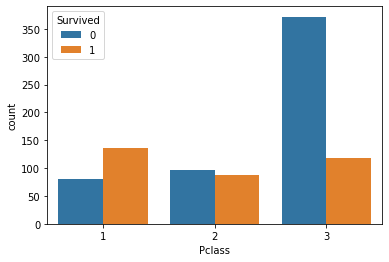

In [12]:
sns.countplot(x='Pclass',data = titanic_train, hue = 'Survived')

Looking at actual survival rates.

In [13]:
titanic_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


Being in a higher class increaed your chances of survival. The same exercise is done for gender, where male = 0 and female = 1

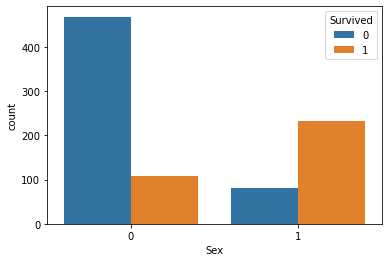

In [14]:
sns.countplot(x='Sex',data=titanic_train, hue='Survived')

In [15]:
titanic_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived')

,Survived
Sex,
0,0.188908
1,0.742038


Being female greatly increased the chances of survival. Number of siblings was looked at next

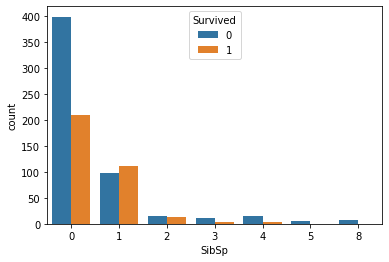

In [16]:
sns.countplot(x='SibSp',data=titanic_train, hue='Survived')

No strong conclusions can be made with this data. Age was then looked at. First on two different histograms.

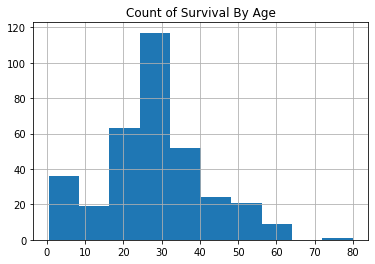

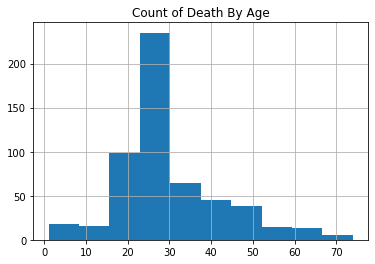

In [17]:
titanic_train_survive = titanic_train[titanic_train['Survived'] == 1]
titanic_train_died = titanic_train[titanic_train['Survived'] == 0]

titanic_train_survive.Age.hist(bins = 10)
plt.title("Count of Survival By Age")
plt.show()
titanic_train_died.Age.hist(bins = 10)
plt.title("Count of Death By Age")
plt.show()

And then overlayed to compare distribution

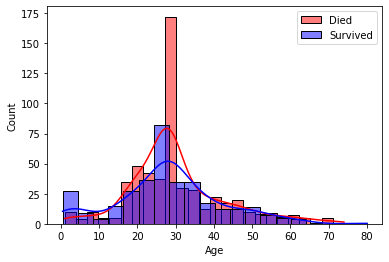

In [18]:
fig,ax = plt.subplots()
sns.histplot(titanic_train[titanic_train['Survived']==0]['Age'],color = 'r',label = 'Died',ax=ax,kde = True)
sns.histplot(titanic_train[titanic_train['Survived']==1]['Age'],color = 'b',label = 'Survived',ax=ax,kde = True)
plt.legend()

Being younger increased the change of survival. A pairplot was created to see if there are any other conclusions to be made.

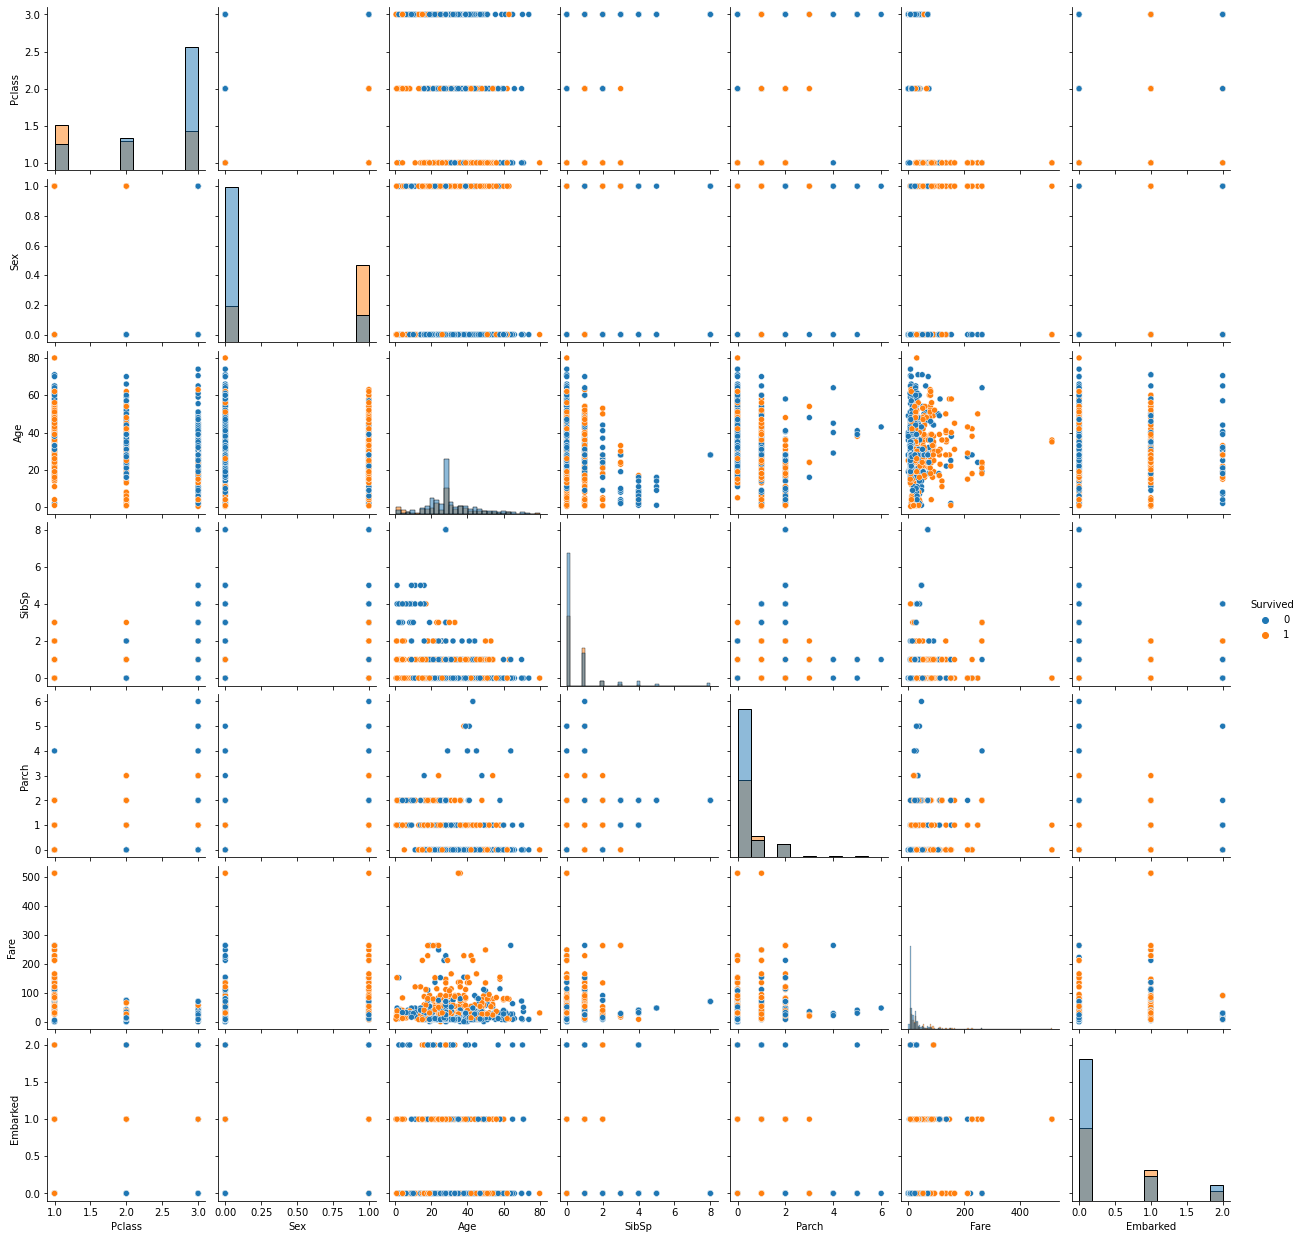

In [19]:
g = sns.pairplot(titanic_train,diag_kind="hist",hue = 'Survived',dropna = True)

The pair plot shows that spending more on the fare also increase survival chances. A heatmap was created to see if there are any correlated variables that can be removed.

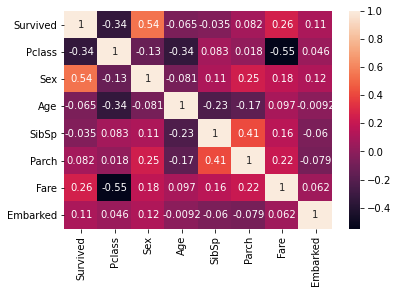

In [20]:
titanic_train_corr = titanic_train.corr()
sns.heatmap(titanic_train_corr,annot=True)
#print(titanic_train_corr)
#sns.heatmap(titanic_train_corr, fmt='g', cmap = 'Spectral').set(title = 'Correlation Matrix')
#plt.show()

Heatmap confirms the high correlation bewteen Sex and Survived. Other correlations are not as stong. PCA was run to determine the variables that have more weight in determining survival.

In [21]:
#pca analysis
from pca import pca

features = ['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked']
X = titanic_train.loc[:,features].values
y = titanic_train.loc[:,'Survived'].values

[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


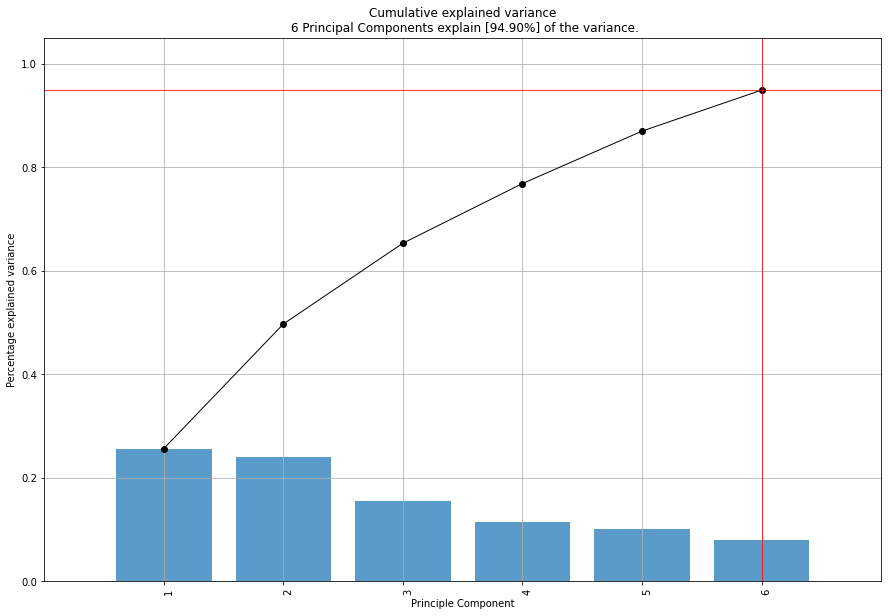

<Figure size 432x288 with 0 Axes>

In [22]:
model = pca(n_components=6,normalize = True)
results = model.fit_transform(X,col_labels = features,row_labels = y)

# Plot explained variance
fig, ax = model.plot()

In [23]:
print(model.results['topfeat'])

    PC   feature   loading  type
0  PC1      Fare  0.571703  best
1  PC2       Age  0.554338  best
2  PC3  Embarked  0.851590  best
3  PC4       Sex -0.749587  best
4  PC5       Age  0.787430  best
5  PC6     Parch  0.678252  best
6  PC2    Pclass -0.532689  weak
7  PC6     SibSp -0.658818  weak


In decending order: Fare, Age, Embarked, and Sex were the top four variables that explained the sample variance. Those four variables are the starting point for the algorithms.

Next is to remove any outliers in the data. Age and Fare are looked at for outliers as the other variables are categorical. An outier here is defined as a value outside of the 5-95 percentile.

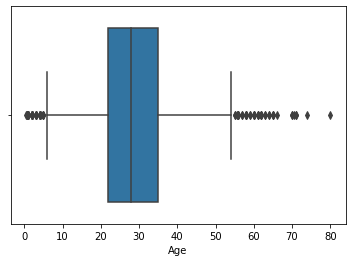

In [24]:
sns.boxplot(x=titanic_train['Age'],whis=[5,95])

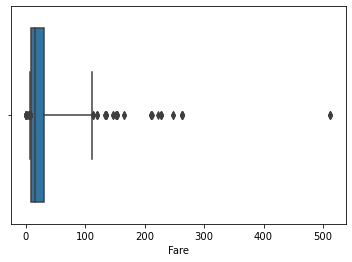

In [25]:
sns.boxplot(x=titanic_train['Fare'],whis=[5,95])

In [26]:
titanic_train[["Age", "Fare"]].describe(percentiles = [.05,.25,.5,.75,.95])

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
5%,6.000000,7.225000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
95%,54.000000,112.079150
max,80.000000,512.329200


In [27]:
titanic_train.drop(titanic_train[titanic_train["Age"] >\
                                 (np.percentile(titanic_train["Age"], 95))].index, inplace=True)
titanic_train.drop(titanic_train[titanic_train["Age"] <\
                                 (np.percentile(titanic_train["Age"], 5))].index, inplace=True)

titanic_train.drop(titanic_train[titanic_train["Fare"] >\
                                 (np.percentile(titanic_train["Fare"], 95))].index, inplace=True)
titanic_train.drop(titanic_train[titanic_train["Fare"] <\
                                 (np.percentile(titanic_train["Fare"], 5))].index, inplace=True)


# Classification Methods

Splitting the training set for training and validating. A 80/20 split was used.

In [28]:
from sklearn.model_selection import train_test_split

dataCM1 = titanic_train

X = dataCM1.drop('Survived',axis=1)
y = dataCM1['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=15)

In [29]:
X_train.shape, X_val.shape

((586, 8), (147, 8))

In [30]:
X_val.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
369,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,69.3000,1
502,3,"O'Sullivan, Miss. Bridget Mary",1,28.0,0,0,7.6292,2
140,3,"Boulos, Mrs. Joseph (Sultana)",1,28.0,0,2,15.2458,1
384,3,"Plotcharsky, Mr. Vasil",0,28.0,0,0,7.8958,0
686,3,"Panula, Mr. Jaako Arnold",0,14.0,4,1,39.6875,0


**Classification Method 1 - SVC**

For the first attempt I am using Support Vector Classification. For the kernel I am using a 5th order polynomial. The important values kept at default are unlimited iterations (max_iter = -1) and the stopping criterion (tol = 1e-3).

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(kernel = 'poly',degree = 5)

#Determined Important Features
features = ['Fare','Age','Embarked','Sex']

X_trainSVC = X_train.loc[:, features]

modelSVC.fit(X_trainSVC, y_train)

print('Training accuracy = ', accuracy_score(y_train, modelSVC.predict(X_trainSVC)))
#print('Training accuracy = ', modelSVC.score(X_trainSVC, y_train)*100)

X_valSVC = X_val.loc[:, features]
print('Validation accuracy = ', accuracy_score(y_val, modelSVC.predict(X_valSVC)))

Training accuracy =  0.71160409556314
Validation accuracy =  0.6666666666666666


As a second attempt I changed the kernal to Radial Basis Function which performed slightly better.

In [32]:
modelSVC2 = SVC(kernel = 'rbf')

features = ['Fare','Age','Embarked','Sex']

X_trainSVC2 = X_train.loc[:, features]

modelSVC2.fit(X_trainSVC2, y_train)

print('Training accuracy = ', accuracy_score(y_train, modelSVC2.predict(X_trainSVC2)))

X_valSVC2 = X_val.loc[:, features]
print('Validation accuracy = ', accuracy_score(y_val, modelSVC2.predict(X_valSVC2)))

Training accuracy =  0.6843003412969283
Validation accuracy =  0.6462585034013606


**Classification Model 2 - Decision Tree**

My second attempt used a decison tree classifier. The quality of a split was measured with entropy. The min samples to require a split was increased from the default of 2 to 20. After testing a few values, increasing the amount of samples to initiate a split improved the validation accuracy. It is possible for this dataset that with the default 2 there is excess overfitting to the training set. A greedy approach was used for splitting on the default value splitter="best".

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

modelDTC = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 20,splitter = "best")

features = ['Fare','Age','Embarked','Sex']

X_trainDTC = X_train.loc[:, features]

modelDTC.fit(X_trainDTC,y_train)

print('Training accuracy = ', accuracy_score(y_train, modelDTC.predict(X_trainDTC)))
#print('Training accuracy = ', modelDTC.score(X_trainDTC, y_train)*100)

X_valDTC = X_val.loc[:, features]
print('Validation accuracy = ', accuracy_score(y_val, modelDTC.predict(X_valDTC)))

Training accuracy =  0.8720136518771331
Validation accuracy =  0.7619047619047619


**Classification Model 3 - Boosting**

The third attempt used Gradient Boosting Classifier. The number of boosting stages was increased from 100 to 200. The min split and leaf values were kept as default due to GBCs resilience to over-fitting. The tolerance for stopping was kept at default tol=1e-4.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

modelGBC = GradientBoostingClassifier(max_depth = 3, n_estimators = 200)

features = ['Fare','Age','Embarked','Sex']

X_trainGBC = X_train.loc[:, features]

modelGBC.fit(X_trainGBC,y_train)

print('Training accuracy = ', accuracy_score(y_train, modelGBC.predict(X_trainGBC)))

X_valGBC = X_val.loc[:, features]
print('Validation accuracy = ', accuracy_score(y_val, modelGBC.predict(X_valGBC)))

Training accuracy =  0.9351535836177475
Validation accuracy =  0.7891156462585034


**Test Prediction csv creation**

In [35]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [36]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [37]:
#Prepare Test Data
features = ['Fare','Age','Embarked','Sex']
X_test = titanic_test.loc[:,features].copy()

#Classification Model 1 - SVC
submitSVC = pd.DataFrame(titanic_test['PassengerId'])
submitSVC['Survived'] = modelSVC2.predict(X_test)
submitSVC.to_csv('submitSVC.csv',index = False)

#Classification Model 1 - Decision Tree
submitDTC = pd.DataFrame(titanic_test['PassengerId'])
submitDTC['Survived'] = modelDTC.predict(X_test)
submitDTC.to_csv('submitDTC.csv',index = False)

#Classification Model 1 - Gradient Boosting
submitGBC = pd.DataFrame(titanic_test['PassengerId'])
submitGBC['Survived'] = modelGBC.predict(X_test)
submitGBC.to_csv('submitGBC.csv',index = False)

# **Results**

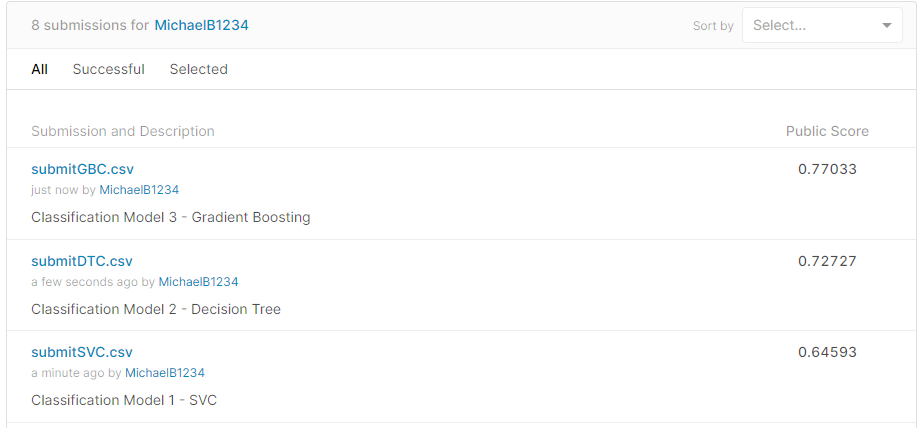

In [38]:
from IPython.display import Image
Image("Titanic_Predictions.png")

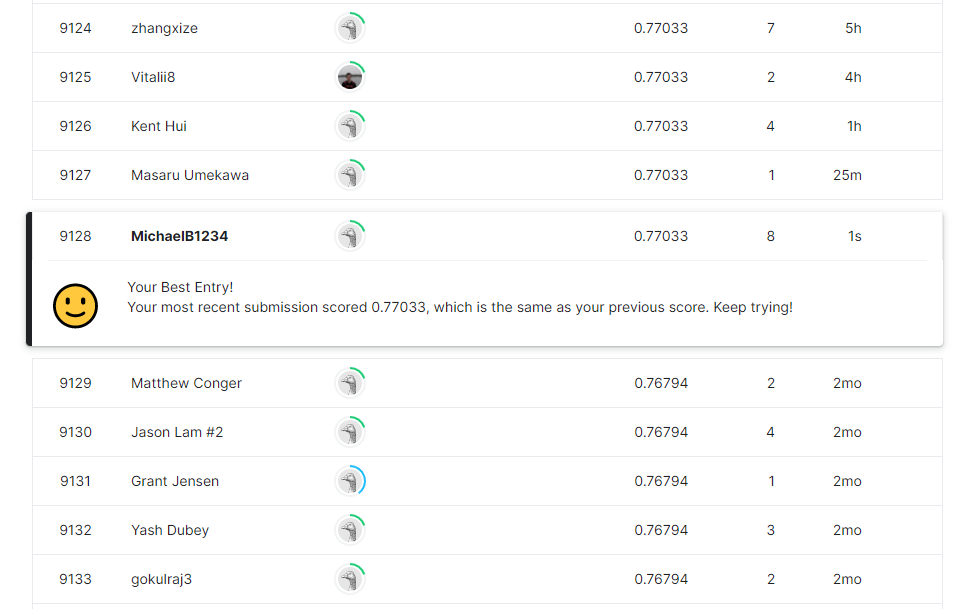

In [39]:
from IPython.display import Image
Image("Titanic_Leaderboard.png")

# **Conclusion**

At the time of writing this, my 3rd classification model using Gradient Boosting had an accuracy of 77.03% and placed 9128th on the leader board. Some steps that can be taken to imporve accuracy is to change the split of training and validation, modify/optimize all hyperparameters, changing the input variables, and exploring other classification techniques. The way that the NaN for Age are filled can also be changes to use the mean or split the NaN over multiple values using a correlation to another value (classifying the age). The Sex category can be extended to have a 3rd option of "Child" as the chance of survival for a child was higher regardless of gender. Looking at the leaderboard there is some success using regressions which could be explored as well. 

**Other Models Tested**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

features = ['Fare','Age','Embarked','Sex']

X_trainKNN = X_train.loc[:, features]

modelKNN.fit(X_trainKNN,y_train)

print('Training accuracy = ', accuracy_score(y_train, modelKNN.predict(X_trainKNN)))

X_valKNN = X_val.loc[:, features]
print('Validation accuracy = ', accuracy_score(y_val, modelKNN.predict(X_valKNN)))

Training accuracy =  0.9744027303754266
Validation accuracy =  0.7346938775510204


In [41]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(n_estimators=100, max_depth = 6, criterion = 'gini',n_jobs = -1)

features = ['Fare','Age','Embarked','Sex','Parch']

X_trainRFC = X_train.loc[:, features]

modelRFC.fit(X_trainRFC,y_train)

print('Training accuracy = ', accuracy_score(y_train, modelRFC.predict(X_trainRFC)))

X_valRFC = X_val.loc[:, features]
print('Validation accuracy = ', accuracy_score(y_val, modelRFC.predict(X_valRFC)))

Training accuracy =  0.8737201365187713
Validation accuracy =  0.7278911564625851
